In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

1. Plot the data in the matrix housing_price_index.

In [ ]:
dataset = pd.read_csv('/content/housing_price_index.csv',header=None)
X = dataset[0]
y = dataset[1]

2. As you probably notice the relationship among the variables doesn’t seem to be linear. Try
to fit (and plot using subplot(2,2,i)) all polynomial models f(X) = 0 +1X +2X2 +
: : :+dXd for degrees d 2 [1; 4]. Which polynomial degree do you think gives the best fit?
Motivate your answer!

MSE for the polynomial Regression of degree 1 : 2896.0936799814576
MSE for the polynomial Regression of degree 2 : 585.067575900907
MSE for the polynomial Regression of degree 3 : 454.54345077269664
MSE for the polynomial Regression of degree 4 : 443.7602521836896


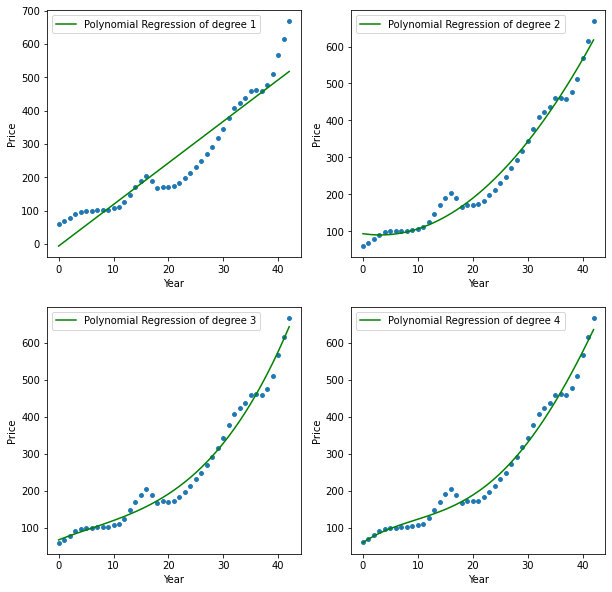

In [ ]:
fig = plt.figure(figsize=(10,10))
for i in range(1,5):
    pipe=Pipeline([('polynomial',PolynomialFeatures(degree=i)),('modal',LinearRegression())])
    pipe.fit(np.array(X).reshape(-1,1),np.array(y).reshape(-1,1))
    poly_pred=pipe.predict(np.array(X).reshape(-1,1))
    MSE = mean_squared_error(y, poly_pred)
    print("MSE for the polynomial Regression of degree " + str(i) +" : " + str(MSE))
    sorted_zip = sorted(zip(X,poly_pred))
    x_poly, poly_pred = zip(*sorted_zip)

    plt.subplot(2, 2, i)
    plt.scatter(X,y,s=15)
    title = 'Polynomial Regression of degree '+str(i) 
    plt.plot(x_poly,poly_pred,color='g',label=title)
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.legend()
plt.show()

I think polynomial degeree 4 is the best fit. Visually, for polynomial degree 3 and 4 seems good, So calculated MSE. 
MSE for degree 3 = 454.5434507726966 &              
MSE for degree 4 = 443.7602521836896 . 
MSE for degree 4 is less. so we choose degree 4.

3. A lucky couple bought in 2015 a house in Växjö for 2.3 million SEK. What can they expect
to get, using your “best fit model”, for their house when they sell it in 2022? Is your answer
realistic?

In [ ]:
pipe=Pipeline([('polynomial',PolynomialFeatures(degree=4)),('modal',LinearRegression())])
pipe.fit(np.array(X).reshape(-1,1),np.array(y).reshape(-1,1))
pred_price_2022 = pipe.predict([[47]])
original_price_2015 = y[40]
expected_selling_price = 2.3*pred_price_2022/original_price_2015
print("Predicted price for the year 2022 : ", pred_price_2022[0][0])
print("Price mentioned in dataset for the year 2015 : ",original_price_2015)
print("House price the couple bought for : 2.3 million SEK")
print("Estimated seslling price of the house in 2022( prediction * 2.3 / dataset price in 2015) : ", round(expected_selling_price[0][0],3), " million SEK" )

Predicted price for the year 2022 :  799.3364217409533
Price mentioned in dataset for the year 2015 :  568
House price the couple bought for : 2.3 million SEK
Estimated seslling price of the house in 2022( prediction * 2.3 / dataset price in 2015) :  3.237  million SEK
